## 数据预处理

In [14]:
import pandas as pd
data = pd.read_csv(r"C:\Users\dangh\code\Python\newanalysis\Travel.csv", encoding='gbk')
data.dtypes
data[data["天数"]=="99+"]
data.loc[[203],"天数"]=6
data.loc[[351],"天数"]=7
data.loc[[924],"天数"]=8
data.loc[[203,351,924]]
data["天数"]=data["天数"].astype("int")
pd.to_datetime(data['出发时间'])
data["出发时间"]=data["出发时间"].astype("datetime64[ns]")
data.dtypes

地点              object
出发时间    datetime64[ns]
天数               int32
人均费用             int64
人物              object
dtype: object

## 绘制热门城市旅游文章数量柱状图

In [17]:
df=data["地点"].value_counts()
df=df.head(5)
df


地点
三亚      114
重庆       35
呼伦贝尔     31
成都       30
北京       22
Name: count, dtype: int64

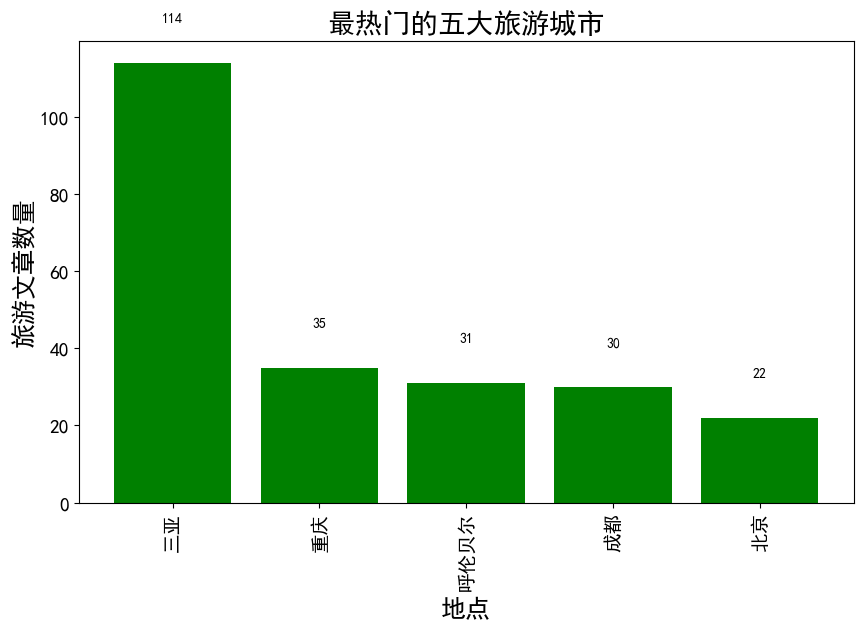

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

x = df.index
y = df.values

# 设置字体为 SimHei 以显示中文
plt.rcParams["font.sans-serif"] = ["SimHei"]
# 设置负号正常显示
plt.rcParams["axes.unicode_minus"] = False

# 设置图片大小
plt.figure(figsize=(10, 6))

# 绘制柱状图
plt.bar(x, y, color="g")

# 设置标题，标签和字体大小
plt.title("最热门的五大旅游城市", fontsize=20)
plt.xlabel("地点", fontsize=18)
plt.ylabel("旅游文章数量", fontsize=18)

# 设置刻度标签的字体大小和旋转角度
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)

# 在柱子上显示数据
for a, b in zip(x, y):
    plt.text(a, b + 10, str(b), ha="center", va="bottom", fontsize=10)

# 显示图表
plt.show()


## 根据旅游结伴人数绘制饼图

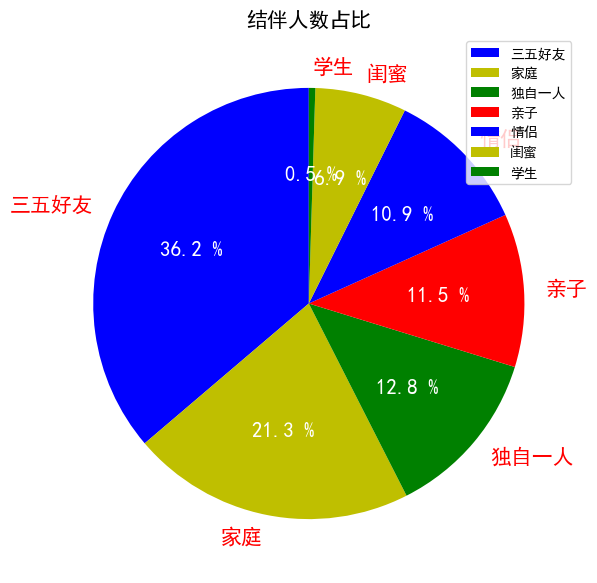

In [19]:
import matplotlib.pyplot as plt
import pandas as pd


# 根据旅游结伴人数绘制饼图
df1 = data['人物'].value_counts()
y = df1.values
y = y / sum(y)  # 归一化

# 设置图片大小
plt.figure(figsize=(7, 7))

# 设置图形标题
plt.title("结伴人数占比", fontsize=15)

# 绘制饼图
patches, l_text, p_text = plt.pie(y, labels=df1.index, autopct="%.1f %%", colors=["b", "y", "g", "r"], startangle=90)

# 设置饼图内部字体
for i in p_text:
    i.set_size(15)
    i.set_color('w')

# 设置饼图外部字体
for i in l_text:
    i.set_size(15)
    i.set_color('r')

# 添加图例
plt.legend()
plt.show()


## 绘制人均费用直方图

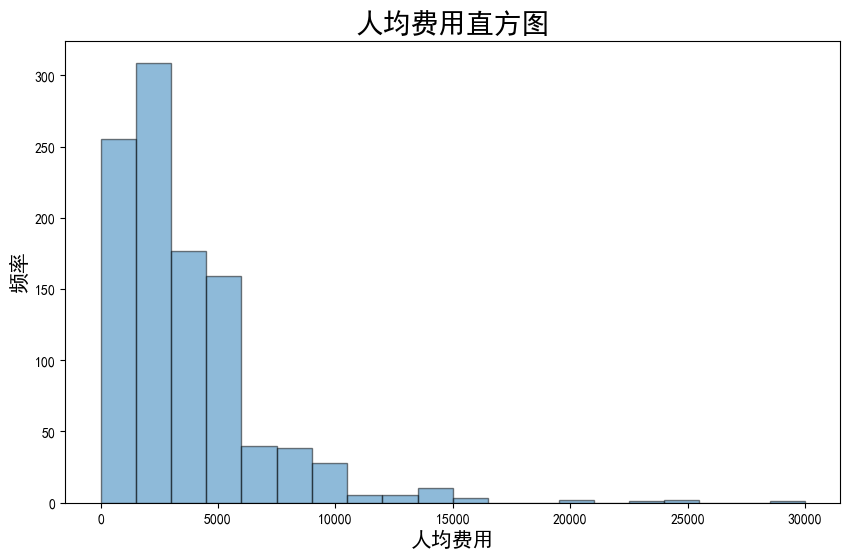

In [20]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制直方图，设置边框颜色和透明度
plt.hist(data["人均费用"], bins=20, edgecolor='k', alpha=0.5)

# 设置标题和标签
plt.title("人均费用直方图", fontsize=20)
plt.xlabel("人均费用", fontsize=15)
plt.ylabel("频率", fontsize=15)

# 显示图表
plt.show()


## 绘制频率直方图

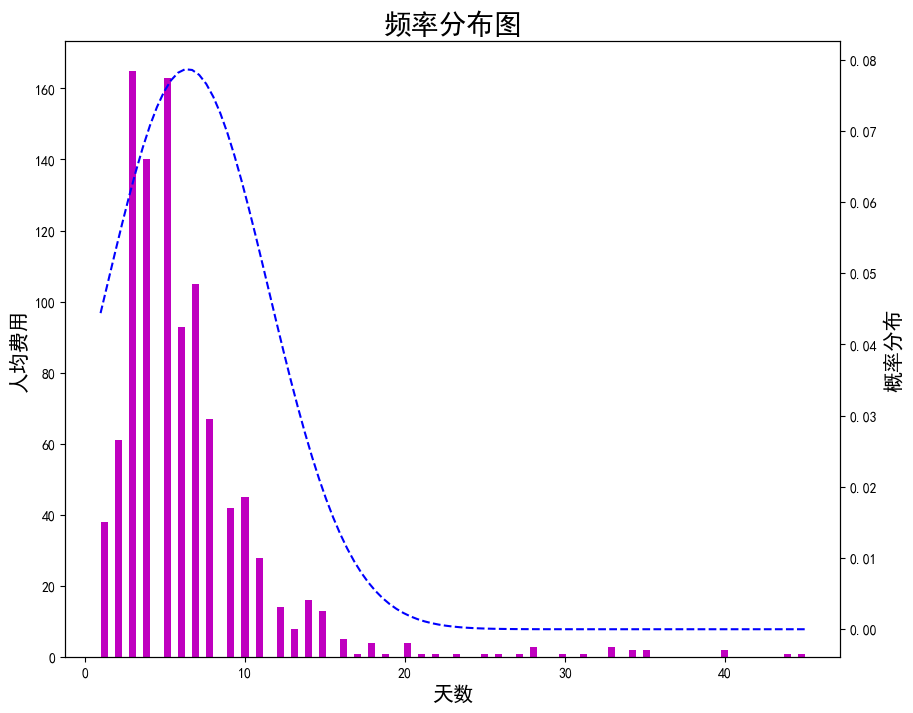

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

# 绘制频率直方图
fig = plt.figure(figsize=(10, 8))

# 确认子图
ax1 = fig.add_subplot(111)

# 绘制直方图
n, bins, patches = ax1.hist(data["天数"], bins=100, color='m')

# 设置轴一的标签和标题
ax1.set_ylabel("人均费用", fontsize=15)
ax1.set_xlabel("天数", fontsize=15)
ax1.set_title("频率分布图", fontsize=20)

# 准备拟合正态分布
y = norm.pdf(bins, data["天数"].mean(), data["天数"].std())

# 声明双轴
ax2 = ax1.twinx()

# 绘制拟合曲线
ax2.plot(bins, y, "b--")

# 设置轴二的标签
ax2.set_ylabel("概率分布", fontsize=15)

# 显示图表
plt.show()
